<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/zernike_polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
Build intuition for Zernike polynomials



# Resources
* https://en.wikipedia.org/wiki/Zernike_polynomials
* https://www.spiedigitallibrary.org/ContentImages/Journals/JMMMIH/20/2/020501/FigureImages/JM3_20_2_020501_f001.png
* https://lh3.googleusercontent.com/proxy/5l2394NcZLpJwQO5YDjEIOrIUu0eM5QMztw7FnrArYQuj5D4bNcdurCxOkT7vgEtSef_sxKsa33sUL90tHg-LRGSJUBBcol5TtEdjY9R0H93h6nRE7wsXc60uZ8wCOSFXcJo2oi18EBG1f8K2eJigcHE9A-Jiui3cslGFanQ2_L6MV1HVvCA6XY
* https://wp.optics.arizona.edu/jcwyant/wp-content/uploads/sites/13/2016/08/Zernike-Equations.jpg

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def doplt(arr_2d): return plt.imshow(arr_2d,cmap='gray')

In [52]:
N = 128
arr_1d = np.arange(-N//2,N//2) / (N//2)
yv, xv = np.meshgrid(arr_1d,arr_1d, sparse=False, indexing='ij')
yv *= -1

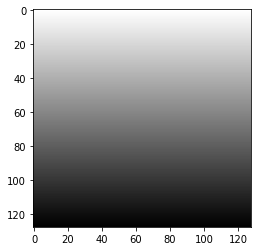

In [53]:
doplt(yv)

In [54]:
rad = np.sqrt(xv**2 + yv**2)
angle = np.arctan2(yv,xv)

Angles go from $-\pi$ to $+\pi$

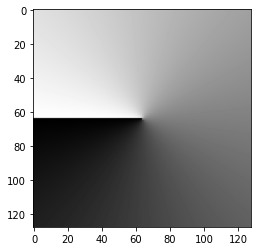

In [55]:
doplt(angle)

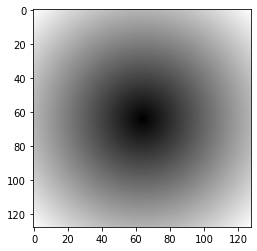

In [56]:
doplt(rad)

# $Z_1^l$

The first few Zernike polynomials are

|$Z^l_n$|Functional form|
|-|-|
|$Z^{1}_1$|$r\cos\theta$|

Let's look at the parts of $Z_1^1$ separately: $r$ and $\cos\theta$. Although it may seem unintuitive when we consider them separately, then multiply to x, of course, by the familiar polar transformation.

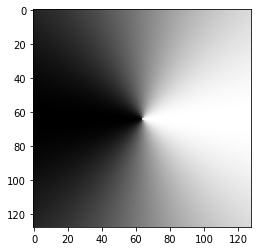

In [57]:
doplt(np.cos(angle))

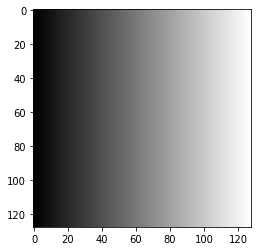

In [47]:
doplt(rad*np.cos(angle))

$Z_1^{-1}$ is just with $\cos \rightarrow \sin$ and thus is just $y$

# $Z_2^l$

|$Z^l_n$|Functional form|
|-|-|
|$Z_2^{-2}$|$r^2\sin[2\theta]$|
|$Z_2^{0}$|$2r^2-1$|
|$Z_2^{2}$|$r^2\sin[2\theta]$|

We can see that the corners are more intense in $Z_2^{-2}$, aka "oblique astigmatism"

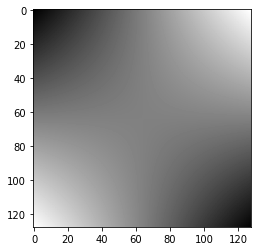

In [58]:
doplt(rad**2*np.sin(2*angle))

And the sides in  $Z_2^{2}$, aka "vertical astigmatism"


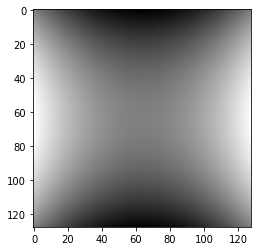

In [59]:
doplt(rad**2*np.cos(2*angle))

$Z_2^0$ is defocus and is spherically symmetric

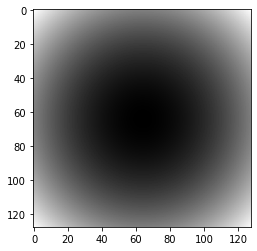

In [60]:
doplt(rad**2-1)

# $Z_3^l$

|$Z^l_n$|Functional form  ......|
|-|-|
|$Z_3^{-3}$|$r^3\sin[3\theta]$|
|$Z_3^{-1}$|$[3r^2-2r]\sin[\theta]$|
|$Z_3^{1}$|$[3r^2-2r]\cos[\theta]$|
|$Z_3^{3}$|$r^3\cos[3\theta]$|

$Z_3^{-3}r^3\sin[3\theta]$

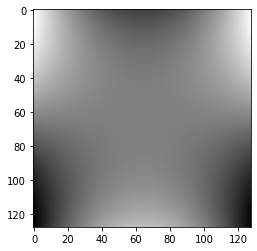

In [61]:
doplt(rad**3*np.sin(3*angle))

It's hard to see in this visualization (plotting in a square) but there is a light and dark ring at the top and bottom respectively

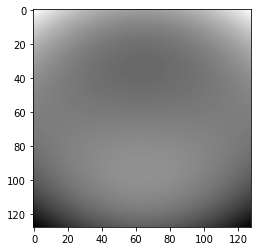

In [69]:
doplt((3*rad**3-2*rad)*np.sin(angle))

# Conclusion

We can keep doing this for higher and higher order. There is nothing particulary esoteric about these functions.

$$
Z^m_n(r,\theta) = R^m_n(r)\cos(m\theta) \ \ \text{m even} \\
Z^{-m}_n(r,\theta) = R^m_n(r)\sin(m\theta) \ \ \text{m odd} \\
n \geq m \geq 0
$$

There is a radial part that is some polynomial up to $r^l$ with integer coefficients, and a $\cos$ or $\sin$ part with $m$ modulating the period of the angular part.